In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tqdm.autonotebook import tqdm
import numpy as np
import pandas as pd 
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.layers import Lambda, Input, GlobalAveragePooling2D,BatchNormalization
from keras.utils import to_categorical
from keras import regularizers

from keras.models import Model

from keras.utils import load_img
# from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions


In [ ]:
labels = pd.read_csv('labels.csv')
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
labels.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

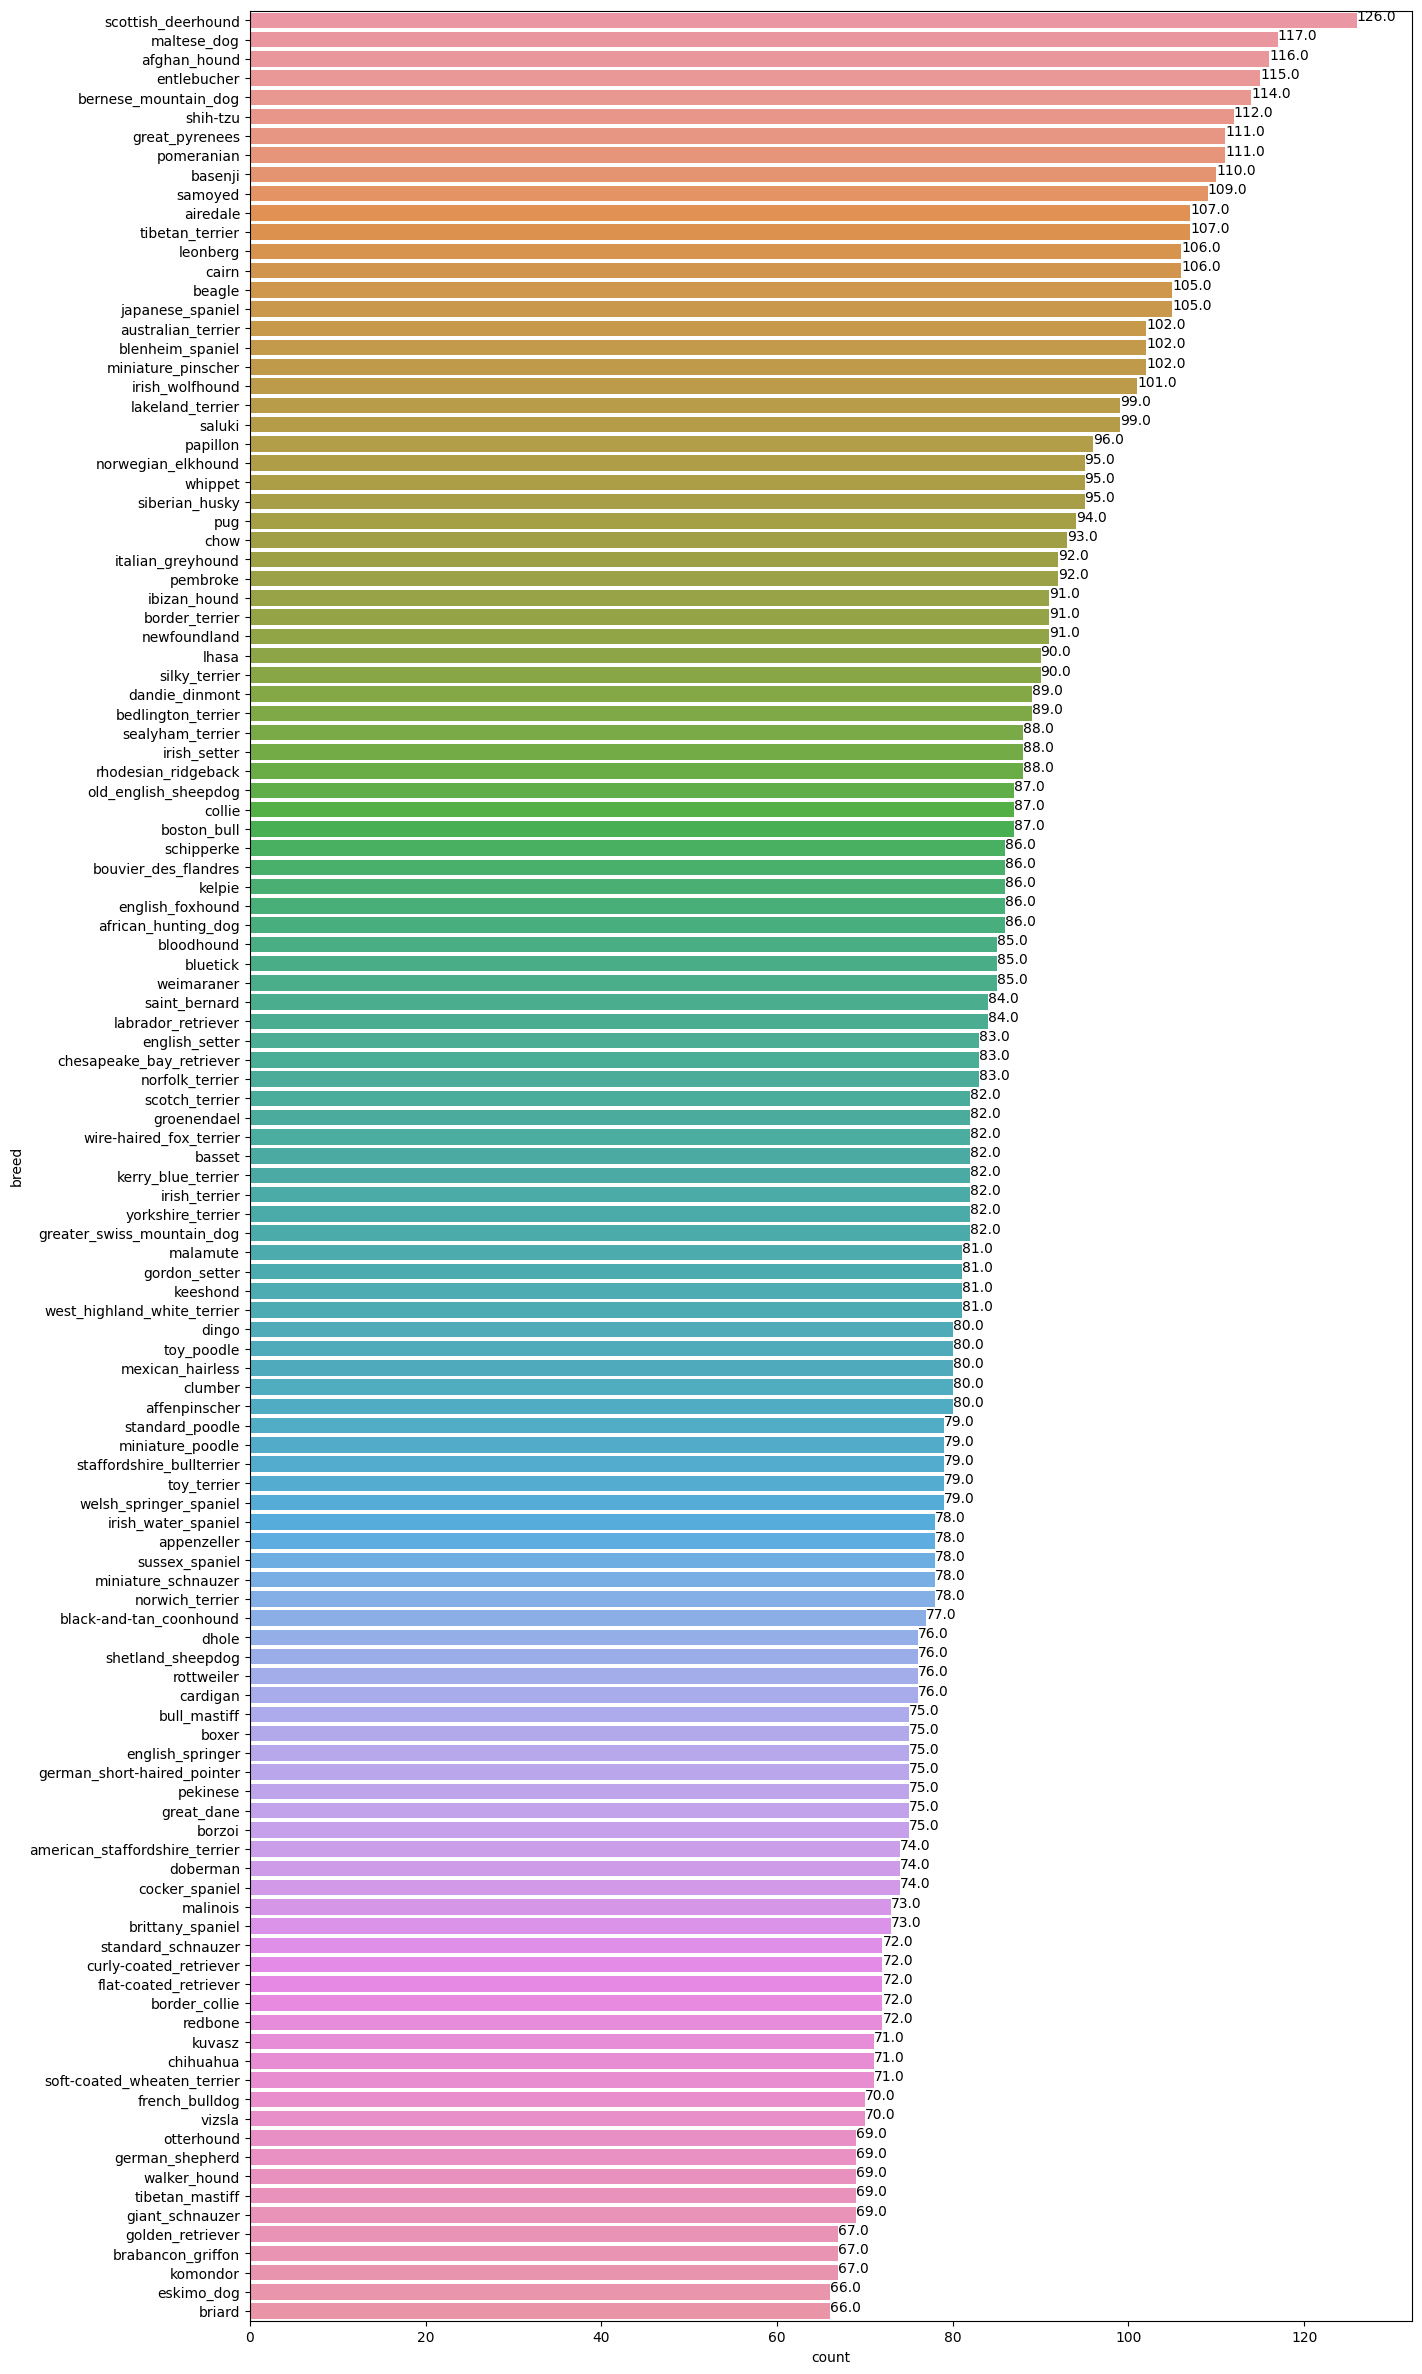

In [ ]:
def barw(ax): 
    for p in ax.patches:
        val = p.get_width()
        x = p.get_x()+ p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(round(val,2),(x,y))

plt.figure(figsize = (15,30))
ax0 =sns.countplot(y=labels['breed'],order=labels['breed'].value_counts().index)
barw(ax0)
plt.show()

In [ ]:
labels['breed'].nunique()

120

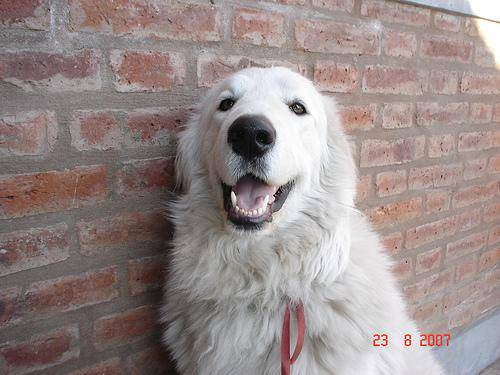

In [ ]:
from IPython.display import display, Image
Image("../dog_project/train/0a0c223352985ec154fd604d7ddceabd.jpg")

In [ ]:
if len(os.listdir('../dog_project/train/')) == len(labels['id']):
    print('Number of file matches number of actual images!')
else:
    print('Number of file doesnot matches number of actual images!!')

Number of file matches number of actual images!


In [ ]:
#Create list of alphabetically sorted labels.
classes = sorted(list(set(labels['breed'])))
n_classes = len(classes)
print('Total unique breed {}'.format(n_classes))

#Map each label string to an integer label.
class_to_num = dict(zip(classes, range(n_classes)))
class_to_num

Total unique breed 120


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [ ]:
input_shape = (331,331,3)


def images_to_array(directory, label_dataframe, target_size = input_shape):
    
    image_labels = label_dataframe['breed']
    images = np.zeros([len(label_dataframe), target_size[0], target_size[1], target_size[2]],dtype=np.uint8) #as we have huge data and limited ram memory. uint8 takes less memory
    y = np.zeros([len(label_dataframe),1],dtype = np.uint8)
    
    for ix, image_name in enumerate(tqdm(label_dataframe['id'].values)):
        img_dir = os.path.join(directory, image_name + '.jpg')
        img = load_img(img_dir, target_size = target_size)
#         img = np.expand_dims(img, axis=0)
#         img = processed_image_resnet(img)
#         img = img/255
        images[ix]=img
#         images[ix] = img_to_array(img)
        del img
        
        dog_breed = image_labels[ix]
        y[ix] = class_to_num[dog_breed]
    
    y = to_categorical(y)
    
    return images,y

In [ ]:
import time 
t = time.time()

X,y = images_to_array('../dog_project/train', labels[:])

print('runtime in seconds: {}'.format(time.time() - t))

100%|██████████| 10222/10222 [01:00<00:00, 170.03it/s]

runtime in seconds: 60.12901830673218


In [ ]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [ ]:
X[0]

array([[[108,  46,   0],
        [180, 120,  70],
        [182, 126,  75],
        ...,
        [188, 158,  70],
        [176, 144,  69],
        [214, 182, 107]],

       [[151,  93,  47],
        [167, 111,  64],
        [154, 102,  54],
        ...,
        [185, 155,  65],
        [167, 136,  56],
        [188, 157,  77]],

       [[151,  98,  56],
        [162, 113,  70],
        [142,  95,  51],
        ...,
        [224, 193, 100],
        [200, 168,  81],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [183, 116,  63],
        [184, 117,  64],
        ...,
        [216, 160, 109],
        [213, 160, 106],
        [209, 156, 102]],

       [[186, 119,  66],
        [183, 116,  63],
        [185, 118,  65],
        ...,
        [197, 141,  90],
        [197, 145,  88],
        [199, 147,  90]],

       [[182, 115,  62],
        [183, 116,  63],
        [186, 119,  66],
        ...,
        [183, 126,  73],
        [184, 132,  74],
        [192, 140,  82]]

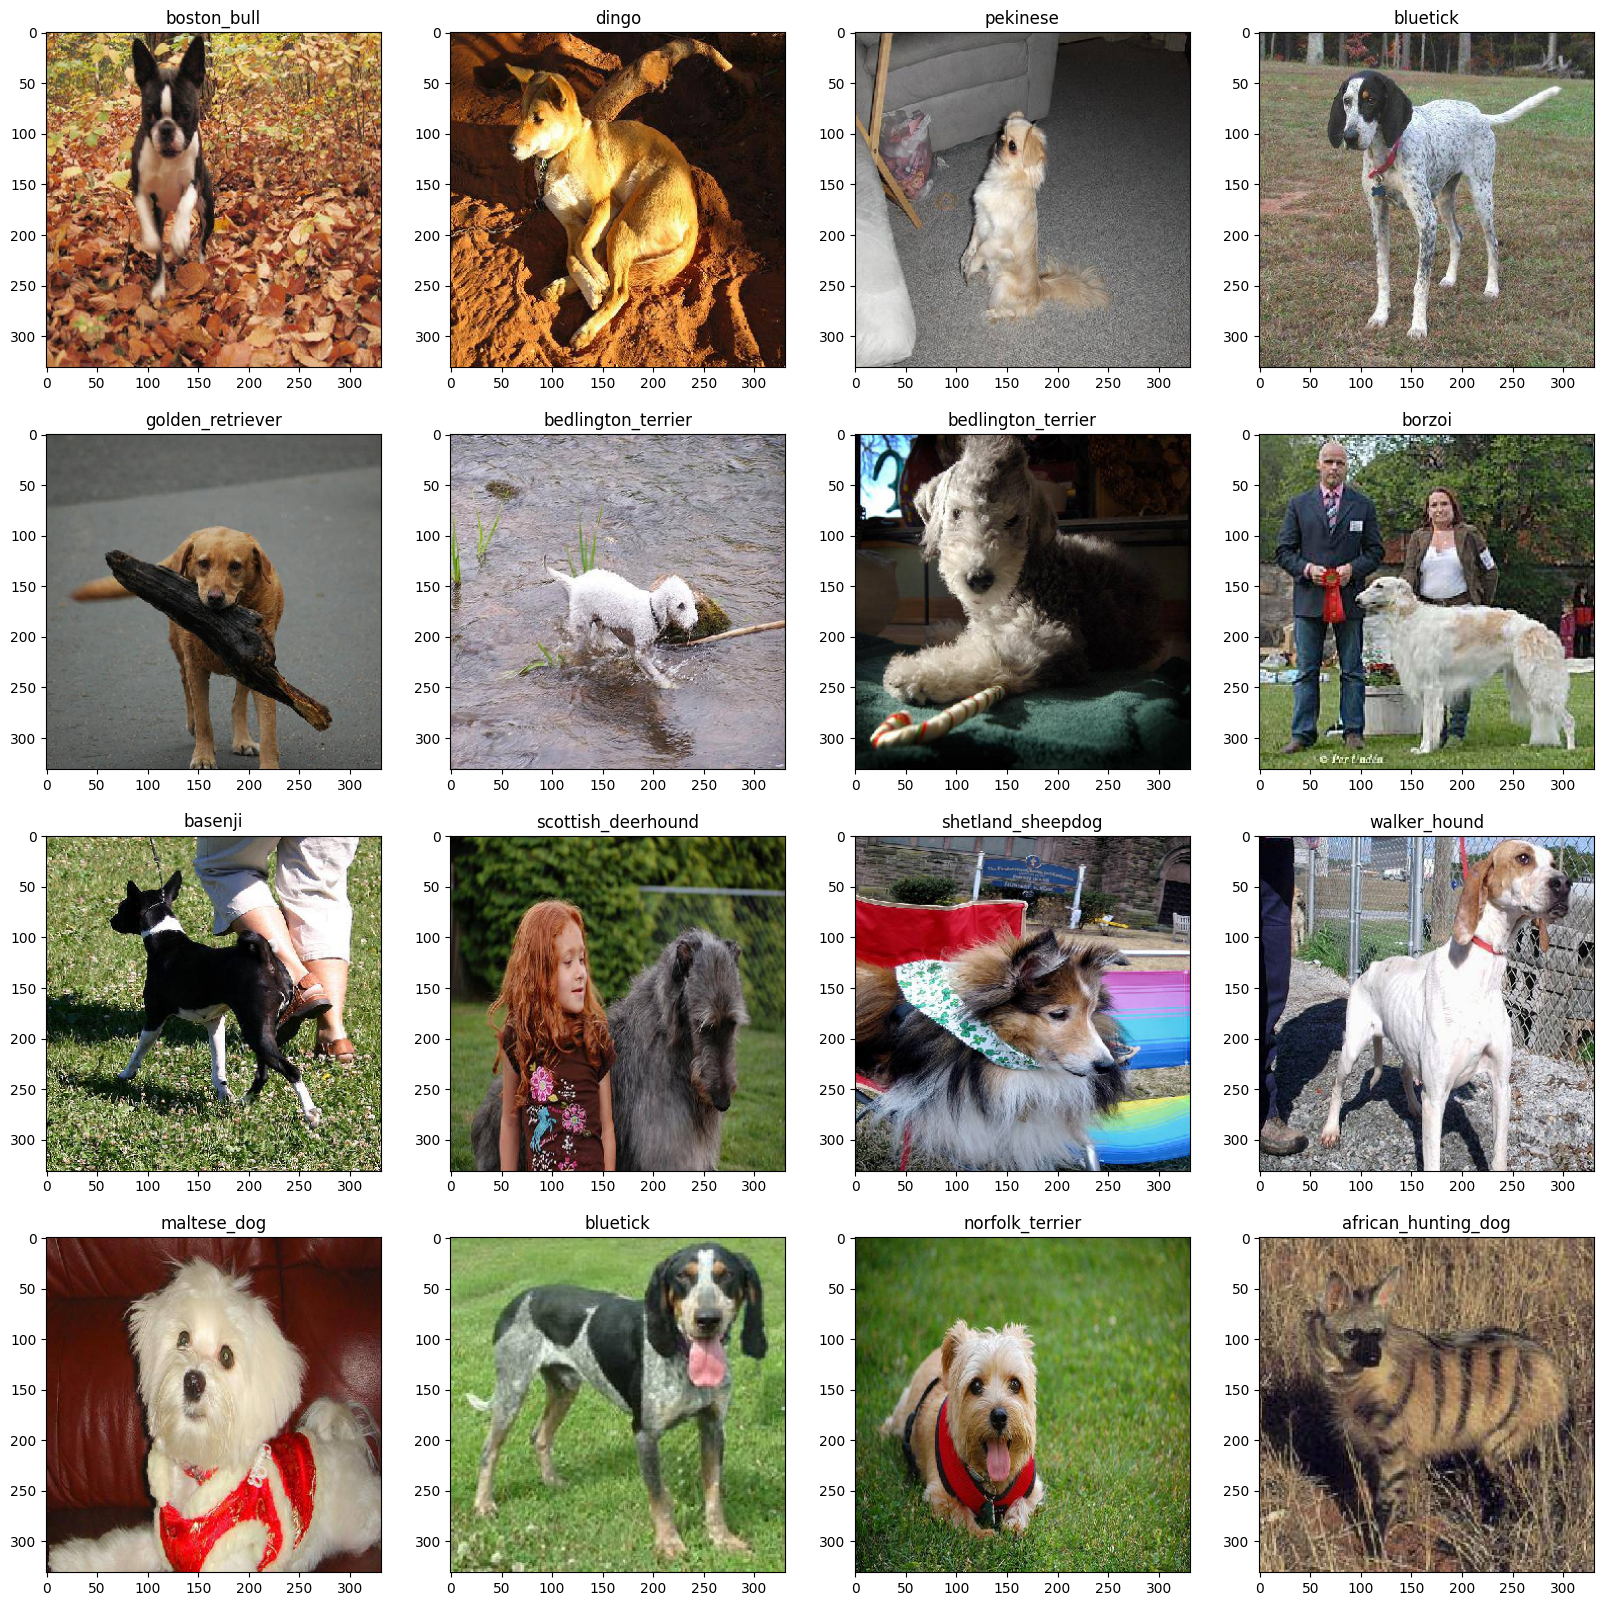

In [ ]:
n=16

plt.figure(figsize=(20,20))

for i in range(n):
    ax = plt.subplot(4, 4, i+1)
    plt.title(classes[np.where(y[i] ==1)[0][0]])
    plt.imshow(X[i].astype('int32'))

In [ ]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5,verbose = 1)

#Prepare call backs
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Hyperparameters
batch_size= 128
epochs=50
learn_rate=.001
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None,  amsgrad=False)

In [ ]:
#function to extract features from the dataset by a given pretrained model
img_size = (331,331,3)

def get_features(model_name, model_preprocessor, input_size, data):

    input_layer = Input(input_size)
    preprocessor = Lambda(model_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False,
                            input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs = input_layer, outputs = avg)
    
    #Extract feature.
    feature_maps = feature_extractor.predict(data, verbose=1)
    print('Feature maps shape: ', feature_maps.shape)
    return feature_maps

In [ ]:
# Extract features using InceptionV3 
from keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocessor = preprocess_input
inception_features = get_features(InceptionV3,
                                  inception_preprocessor,
                                  img_size, X)

320/320 [==============================] - 989s 3s/step
Feature maps shape:  (10222, 2048)


In [ ]:
# Extract features using Xception 
from keras.applications.xception import Xception, preprocess_input
xception_preprocessor = preprocess_input
xception_features = get_features(Xception,
                                 xception_preprocessor,
                                 img_size, X)

320/320 [==============================] - 1704s 5s/step
Feature maps shape:  (10222, 2048)


In [ ]:
# Extract features using InceptionResNetV2 
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
inc_resnet_preprocessor = preprocess_input
inc_resnet_features = get_features(InceptionResNetV2,
                                   inc_resnet_preprocessor,
                                   img_size, X)

320/320 [==============================] - 2478s 8s/step
Feature maps shape:  (10222, 1536)


In [ ]:
# Extract features using NASNetLarge 
from keras.applications.nasnet import NASNetLarge, preprocess_input
nasnet_preprocessor = preprocess_input
nasnet_features = get_features(NASNetLarge,
                               nasnet_preprocessor,
                               img_size, X)

320/320 [==============================] - 5569s 17s/step
Feature maps shape:  (10222, 4032)


In [ ]:
del X #to free up some ram memory
gc.collect()

80428

In [ ]:
#Creating final featuremap by combining all extracted features

final_features = np.concatenate([inception_features,
                                 xception_features,
                                 nasnet_features,
                                 inc_resnet_features,], axis=-1) #axis=-1 to concatinate horizontally

print('Final feature maps shape', final_features.shape)

Final feature maps shape (10222, 9664)


In [ ]:
#Prepare Deep net

model = Sequential()
# model.add(Dense(1028,input_shape=(final_features.shape[1],)))
model.add(Dropout(0.7,input_shape=(final_features.shape[1],)))
model.add(Dense(n_classes,activation= 'softmax'))

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Training the model. 
history = model.fit(final_features, y,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=0.2,
            callbacks=[lrr,EarlyStop])

Epoch 1/50
64/64 [==============================] - 3s 38ms/step - loss: 0.9888 - accuracy: 0.8076 - val_loss: 0.1892 - val_accuracy: 0.9418 - lr: 0.0010
Epoch 2/50
64/64 [==============================] - 2s 32ms/step - loss: 0.1724 - accuracy: 0.9453 - val_loss: 0.1775 - val_accuracy: 0.9443 - lr: 0.0010
Epoch 3/50
64/64 [==============================] - 2s 31ms/step - loss: 0.1381 - accuracy: 0.9557 - val_loss: 0.1820 - val_accuracy: 0.9408 - lr: 0.0010
Epoch 4/50
64/64 [==============================] - 2s 30ms/step - loss: 0.1086 - accuracy: 0.9655 - val_loss: 0.1812 - val_accuracy: 0.9423 - lr: 0.0010
Epoch 5/50
64/64 [==============================] - 3s 40ms/step - loss: 0.0931 - accuracy: 0.9709 - val_loss: 0.1818 - val_accuracy: 0.9443 - lr: 0.0010
Epoch 6/50
64/64 [==============================] - 2s 38ms/step - loss: 0.0781 - accuracy: 0.9774 - val_loss: 0.1879 - val_accuracy: 0.9438 - lr: 0.0010
Epoch 7/50
64/64 [==============================] - 2s 35ms/step - loss: 0.0

In [ ]:
#deleting to free up ram memory

del inception_features
del xception_features
del nasnet_features
del inc_resnet_features
del final_features
gc.collect()

1198

In [ ]:
sample_df = pd.read_csv('sample_submission.csv')

In [ ]:
sample_df.shape

(10357, 121)

In [ ]:
def images_to_array_test(test_path, img_size = (331,331,3)):
    test_filenames = [test_path + fname for fname in os.listdir(test_path)]

    data_size = len(test_filenames)
    images = np.zeros([data_size, img_size[0], img_size[1], 3], dtype=np.uint8)
    
    
    for ix,img_dir in enumerate(tqdm(test_filenames)):
#         img_dir = os.path.join(directory, image_name + '.jpg')
        img = load_img(img_dir, target_size = img_size)
#         img = np.expand_dims(img, axis=0)
#         img = processed_image_resnet(img)
#         img = img/255
        images[ix]=img
#         images[ix] = img_to_array(img)
        del img
    print('Ouptut Data Size: ', images.shape)
    return images

test_data = images_to_array_test('../dog_project/test/', img_size)

100%|██████████| 10357/10357 [01:31<00:00, 112.98it/s]

Ouptut Data Size:  (10357, 331, 331, 3)


In [ ]:
#Extract test data features.
def extact_features(data):
    inception_features = get_features(InceptionV3, inception_preprocessor, img_size, data)
    xception_features = get_features(Xception, xception_preprocessor, img_size, data)
    nasnet_features = get_features(NASNetLarge, nasnet_preprocessor, img_size, data)
    inc_resnet_features = get_features(InceptionResNetV2, inc_resnet_preprocessor, img_size, data)

    final_features = np.concatenate([inception_features,
                                     xception_features,
                                     nasnet_features,
                                     inc_resnet_features],axis=-1)
    
    print('Final feature maps shape', final_features.shape)
    
    #deleting to free up ram memory
    del inception_features
    del xception_features
    del nasnet_features
    del inc_resnet_features
    gc.collect()
    
    
    return final_features

test_features = extact_features(test_data)

324/324 [==============================] - 1037s 3s/step
Feature maps shape:  (10357, 2048)
324/324 [==============================] - 1734s 5s/step
Feature maps shape:  (10357, 2048)
324/324 [==============================] - 4361s 13s/step
Feature maps shape:  (10357, 4032)
324/324 [==============================] - 2050s 6s/step
Feature maps shape:  (10357, 1536)
Final feature maps shape (10357, 9664)


In [ ]:
#Free up some space.
del test_data
gc.collect()

0

In [ ]:
#Predict test labels given test data features.

pred = model.predict(test_features)

324/324 [==============================] - 1s 4ms/step


In [ ]:
# First prediction
print(pred[0])
print(f"Max value (probability of prediction): {np.max(pred[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(pred[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(pred[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {classes[np.argmax(pred[0])]}")

[4.4058279e-06 5.4391330e-06 2.4416602e-06 1.7543542e-07 1.6072742e-06
 1.0711258e-06 6.1435770e-07 2.3141195e-06 2.4635624e-06 1.4236415e-06
 1.5921495e-06 2.2393288e-06 2.1726062e-06 3.4799814e-04 2.4882011e-06
 3.9736433e-06 2.6220810e-06 3.2861752e-07 1.9452082e-06 1.1252682e-05
 1.7379075e-06 6.7294995e-06 8.7934768e-06 1.3248530e-06 2.0939372e-06
 2.5556235e-06 2.5180654e-07 1.0815032e-06 3.4975849e-07 3.8956014e-06
 4.5230636e-06 1.2114519e-05 6.1248193e-06 8.8568768e-06 7.8486772e-07
 1.4983301e-06 3.4263605e-06 2.0918592e-06 1.5924350e-06 2.6492319e-06
 5.2434393e-06 1.7477887e-06 2.6587134e-06 4.0346335e-06 3.2282519e-06
 3.5167818e-06 8.1559102e-07 1.3712234e-06 8.7377310e-07 2.1421422e-06
 4.6749797e-06 1.4453892e-06 2.0680602e-06 2.7035119e-06 7.4139683e-07
 4.1817302e-06 1.3356871e-06 3.9657780e-07 2.0533701e-06 1.2280635e-06
 1.8741346e-06 9.8325610e-01 7.1017575e-06 6.0870713e-07 2.4310093e-06
 2.7462379e-06 1.7440158e-06 2.4616716e-06 5.9647670e-07 1.2947442e-06
 3.681

In [ ]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(classes))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
# Append test image ID's to predictions DataFrame
test_path = "../dog_project/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3  001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4  001a5f3114548acdefa3d4da05474c2e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [ ]:
preds_df.loc[:,list(classes)]= pred

preds_df.to_csv('submission.csv',index=None)
preds_df.head()

C:\Users\lazar\AppData\Local\Temp\ipykernel_26768\758748232.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  preds_df.loc[:,list(classes)]= pred


id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e       0.000004      0.000005   
1  00102ee9d8eb90812350685311fe5890       0.000003      0.000003   
2  0012a730dfa437f5f3613fb75efcd4ce       0.000001      0.000113   
3  001510bc8570bbeee98c8d80c8a95ec1       0.000028      0.000006   
4  001a5f3114548acdefa3d4da05474c2e       0.005884      0.000076   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         2.441660e-06  1.754354e-07                        0.000002   
1         6.571831e-07  3.865529e-07                        0.000003   
2         1.149640e-05  1.564707e-06                        0.000002   
3         2.390814e-06  1.886040e-07                        0.000015   
4         2.424812e-05  3.271339e-06                        0.000017   

   appenzeller  australian_terrier   basenji        basset  ...  toy_poodle  \
0     0.000001        6.143577e-07  0.000002  2.463562e-06  ...    0.000007   
1     0.000003        6.824551e-07  0.000004  7.995252e-07  ...    0.000008   
2     0.000003        2.667572e-07  0.000003  2.001556e-05  ...    0.000004   
3     0.000002        1.722439e-07  0.000007  2.768525e-06  ...    0.000006   
4     0.000019        2.346604e-05  0.000066  5.877064e-05  ...    0.000162   

   toy_terrier    vizsla  walker_hound  weimaraner  welsh_springer_spaniel  \
0     0.000005  0.000005  1.066435e-06    0.000004            5.964403e-07   
1     0.000002  0.000005  1.606831e-06    0.000004            5.091673e-07   
2     0.000004  0.000013  6.630413e-06    0.000072            2.547575e-05   
3     0.000003  0.000004  7.692625e-07    0.000006            4.390413e-07   
4     0.000087  0.000050  1.505021e-05    0.000047            2.891452e-06   

   west_highland_white_terrier   whippet  wire-haired_fox_terrier  \
0                 9.691416e-07  0.000003                 0.000003   
1                 3.617219e-05  0.000003                 0.000001   
2                 1.767175e-06  0.000009                 0.000005   
3                 1.969558e-06  0.000045                 0.000001   
4                 1.614238e-05  0.000094                 0.000036   

   yorkshire_terrier  
0           0.000002  
1           0.000002  
2           0.000004  
3           0.000001  
4           0.000223  

[5 rows x 121 columns]

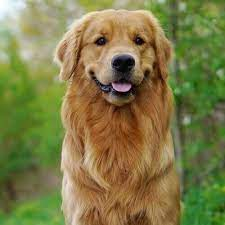

In [ ]:
#Custom input

Image('golden.jpg')

In [ ]:
#reading the image and converting it into an np array

img_g = load_img('golden.jpg',target_size = img_size)
img_g = np.expand_dims(img_g, axis=0) # as we trained our model in (row, img_height, img_width, img_rgb) format, np.expand_dims convert the image into this format
# img_g

In [ ]:
img_g.shape

(1, 331, 331, 3)

In [ ]:
# #Predict test labels given test data features.
test_features = extact_features(img_g)
predg = model.predict(test_features)
print(f"Predicted label: {classes[np.argmax(predg[0])]}")
print(f"Probability of prediction): {round(np.max(predg[0])) * 100} %")

1/1 [==============================] - 1s 1s/step
Feature maps shape:  (1, 2048)
1/1 [==============================] - 1s 972ms/step
Feature maps shape:  (1, 2048)
1/1 [==============================] - 6s 6s/step
Feature maps shape:  (1, 4032)
1/1 [==============================] - 3s 3s/step
Feature maps shape:  (1, 1536)
Final feature maps shape (1, 9664)
1/1 [==============================] - 0s 22ms/step
Predicted label: golden_retriever
Probability of prediction): 100 %


In [ ]:
# Saving the model
# import pickle
# pickle.dump(model, open('model.pkl','wb'))
# model = pickle.load(open('model.pkl','rb'))

In [ ]:
model.save('./model.h5')

In [ ]:
from keras.models import load_model
model = load_model('./model.h5')